In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

2023-09-07 18:40:52.840150: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-07 18:40:53.332416: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import os
import shutil
import random
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
def remove_leading_zeros(s):
    return str(int(s))

In [5]:
data_dir = 'Desktop/Head/Hemorrhage'
csv_file = 'Desktop/Head/labels_hemorrhage.csv'

In [6]:
df = pd.read_csv(csv_file)
print(df.columns)

Index(['filename', 'hemorrhage'], dtype='object')


In [7]:
os.chdir('/home/valentin')
train_hemorrhage_dir = os.path.join('Desktop', 'Licenta-Data', 'Train', 'Head', 'Hemorrhage')
train_no_hemorrhage_dir = os.path.join('Desktop', 'Licenta-Data', 'Train', 'Head', 'NoHemorrhage')
valid_hemorrhage_dir = os.path.join('Desktop', 'Licenta-Data', 'Validation', 'Head', 'Hemorrhage')
valid_no_hemorrhage_dir = os.path.join('Desktop', 'Licenta-Data', 'Validation', 'Head', 'NoHemorrhage')
test_hemorrhage_dir = os.path.join('Desktop', 'Licenta-Data', 'Test', 'Head', 'Hemorrhage')
test_no_hemorrhage_dir = os.path.join('Desktop', 'Licenta-Data', 'Test', 'Head', 'NoHemorrhage')
print(train_hemorrhage_dir)
print(train_no_hemorrhage_dir)
print(valid_hemorrhage_dir)
print(valid_no_hemorrhage_dir)
print(test_hemorrhage_dir)
print(test_no_hemorrhage_dir)
train_hemorrhage = 'Desktop/Licenta-Data/Train/Head'
test_hemorrhage = 'Desktop/Licenta-Data/Test/Head'
valid_hemorrhage = 'Desktop/Licenta-Data/Validation/Head'

Desktop/Licenta-Data/Train/Head/Hemorrhage
Desktop/Licenta-Data/Train/Head/NoHemorrhage
Desktop/Licenta-Data/Validation/Head/Hemorrhage
Desktop/Licenta-Data/Validation/Head/NoHemorrhage
Desktop/Licenta-Data/Test/Head/Hemorrhage
Desktop/Licenta-Data/Test/Head/NoHemorrhage


In [8]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_hemorrhage, target_size=(224,224), classes=['Hemorrhage', 'NoHemorrhage'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_hemorrhage, target_size=(224,224), classes=['Hemorrhage', 'NoHemorrhage'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_hemorrhage, target_size=(224,224), classes=['Hemorrhage', 'NoHemorrhage'], batch_size=10, shuffle=False)

print(test_hemorrhage)

Found 170 images belonging to 2 classes.
Found 19 images belonging to 2 classes.
Found 11 images belonging to 2 classes.
Desktop/Licenta-Data/Test/Head


In [9]:
assert train_batches.n == 170
assert valid_batches.n == 19
assert test_batches.n == 11

In [10]:
imgs, labels = next(train_batches)

In [11]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

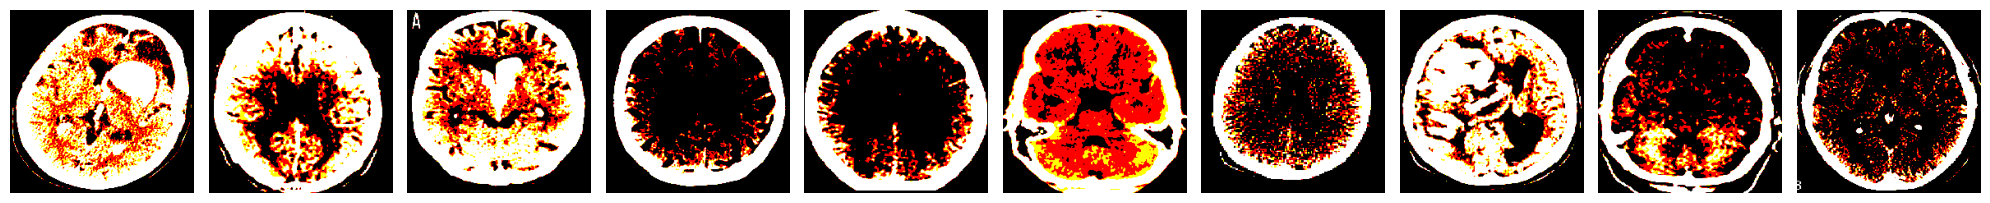

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [12]:
plotImages(imgs)
print(labels)


In [13]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

2023-09-07 18:40:57.382359: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-07 18:40:57.400997: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-07 18:40:57.401213: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10


2023-09-07 18:41:02.959786: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-07 18:41:03.143910: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-07 18:41:03.466307: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f7b58038dc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-07 18:41:03.466325: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 SUPER, Compute Capability 7.5
2023-09-07 18:41:03.497281: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-07 18:41:03.640316: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-07 18:41:03.698857: I ./tensorflow/compiler/jit/devic

17/17 - 3s - loss: 36.6911 - accuracy: 0.6706 - val_loss: 13.5677 - val_accuracy: 0.6842 - 3s/epoch - 173ms/step
Epoch 2/10
17/17 - 1s - loss: 15.4304 - accuracy: 0.7471 - val_loss: 7.8577 - val_accuracy: 0.6316 - 746ms/epoch - 44ms/step
Epoch 3/10
17/17 - 1s - loss: 3.3556 - accuracy: 0.9059 - val_loss: 6.0932 - val_accuracy: 0.7895 - 742ms/epoch - 44ms/step
Epoch 4/10
17/17 - 1s - loss: 1.5431 - accuracy: 0.9235 - val_loss: 3.7005 - val_accuracy: 0.7368 - 724ms/epoch - 43ms/step
Epoch 5/10
17/17 - 1s - loss: 0.4892 - accuracy: 0.9765 - val_loss: 5.1278 - val_accuracy: 0.7895 - 734ms/epoch - 43ms/step
Epoch 6/10
17/17 - 1s - loss: 0.3303 - accuracy: 0.9765 - val_loss: 8.0583 - val_accuracy: 0.8421 - 738ms/epoch - 43ms/step
Epoch 7/10
17/17 - 1s - loss: 0.0601 - accuracy: 0.9824 - val_loss: 4.3205 - val_accuracy: 0.7895 - 723ms/epoch - 43ms/step
Epoch 8/10
17/17 - 1s - loss: 0.0674 - accuracy: 0.9941 - val_loss: 2.8440 - val_accuracy: 0.8421 - 747ms/epoch - 44ms/step
Epoch 9/10
17/17 -

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

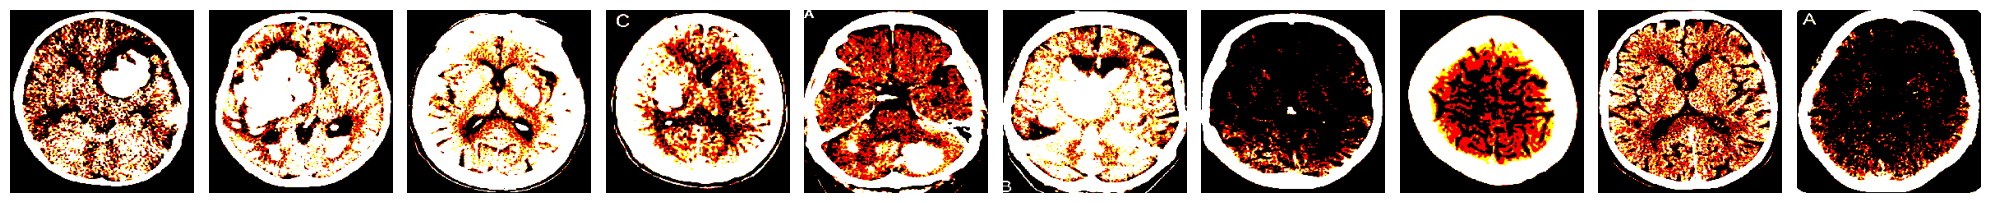

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [22]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [23]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [24]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [25]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[3 3]
 [1 4]]


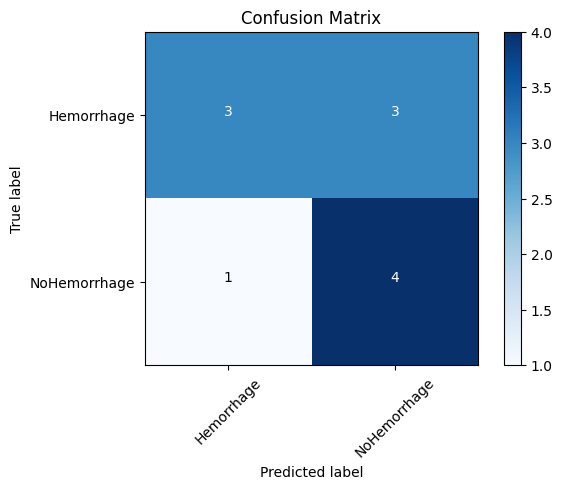

In [28]:
cm_plot_labels = ['Hemorrhage','NoHemorrhage']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')